<a href="https://colab.research.google.com/github/johnboscoimmanuel/Task/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


**Importing the dataset**

In [25]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [27]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [28]:
df.shape

(400, 5)

In [29]:
label=LabelEncoder()

df['Gender']=label.fit_transform(df['Gender'])

In [30]:
df['Gender'].unique()

array([1, 0])

In [31]:
df.head(1)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0


In [32]:
x=df.iloc[:,1:4].values

y=df.iloc[:,-1].values

**Splitting the dataset into the Training set and Test set**

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
x_train.shape,x_test.shape

((320, 3), (80, 3))

**Feature Scaling**

In [35]:
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Fitting SVM to the Training set**

In [36]:
model=SVC(kernel='rbf',random_state=0)

model.fit(x_train,y_train)

SVC(random_state=0)

**Predicting the Test set results**

In [37]:
y_pred=model.predict(x_test)

In [38]:
print('accuracy_score : ',accuracy_score(y_test,y_pred))

accuracy_score :  0.95


**Making the Confusion Matrix**

In [40]:
cm=confusion_matrix(y_test,y_pred)

print('confussion_matrix: ',cm)

confussion_matrix:  [[55  3]
 [ 1 21]]


In [41]:
print('classification_report: ',classification_report(y_test,y_pred))

classification_report:                precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



**Visualising the Training set results**

In [42]:
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


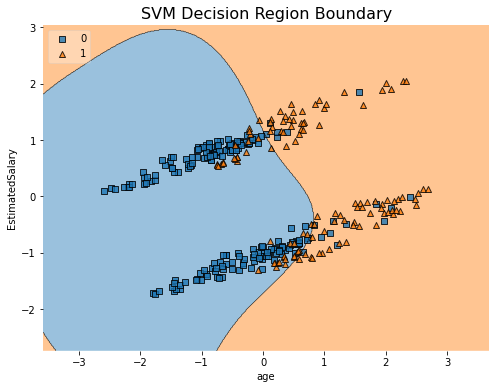

In [49]:
plt.figure(figsize=(8,6))
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
model.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train, clf=model, legend=2)
plt.xlabel('age', size=10)
plt.ylabel('EstimatedSalary', size=10)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


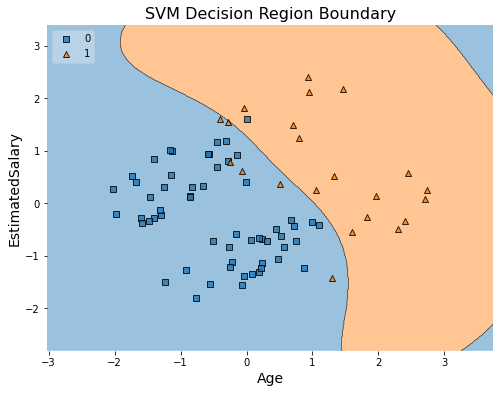

In [52]:
plt.figure(figsize=(8,6))
pca = PCA(n_components = 2)
X_test2 = pca.fit_transform(x_test)
model.fit(X_test2, y_test)
plot_decision_regions(X_test2, y_test, clf=model, legend=2)
plt.xlabel('Age', size=14)
plt.ylabel('EstimatedSalary', size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()